In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, Embedding, GRU
from keras.datasets import imdb

In [2]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
vocab_size = 20000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok="<nothing>"

In [ ]:
X_train

IMDB provides already tokenized dataset

In [ ]:
# from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(X_train)
# tokenizer.fit_on_texts(X_test)
# X_train_sequences = tokenizer.texts_to_sequences(X_train)
# X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [7]:
from keras.utils import pad_sequences

X_train = pad_sequences(X_train,padding=trunc_type,maxlen=max_length)
X_test = pad_sequences(X_test,padding=trunc_type,maxlen=max_length)

Model building

In [8]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(Bidirectional(GRU(32)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               9600      
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 330,261
Trainable params: 330,261
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
history = model.fit(X_train,y_train, epochs = 5, validation_data = (X_test, y_test) )

Epoch 1/5
782/782 [==============================] - 57s 58ms/step - loss: 0.5507 - accuracy: 0.6933 - val_loss: 0.4215 - val_accuracy: 0.8066
Epoch 2/5
782/782 [==============================] - 17s 21ms/step - loss: 0.3389 - accuracy: 0.8567 - val_loss: 0.4331 - val_accuracy: 0.8002
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2493 - accuracy: 0.9026 - val_loss: 0.4557 - val_accuracy: 0.8024
Epoch 4/5
782/782 [==============================] - 16s 21ms/step - loss: 0.1774 - accuracy: 0.9366 - val_loss: 0.5586 - val_accuracy: 0.7837
Epoch 5/5
782/782 [==============================] - 17s 22ms/step - loss: 0.1210 - accuracy: 0.9591 - val_loss: 0.6465 - val_accuracy: 0.7847


In [11]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])

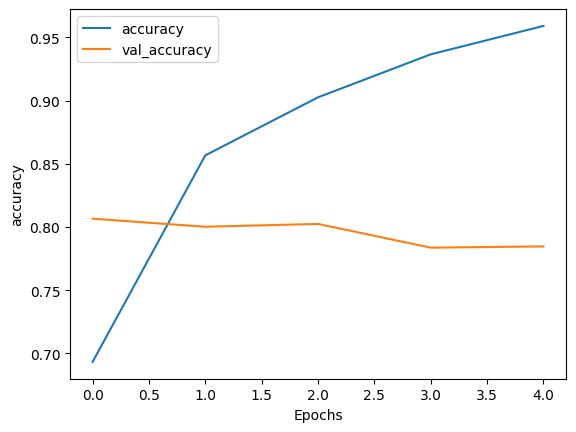

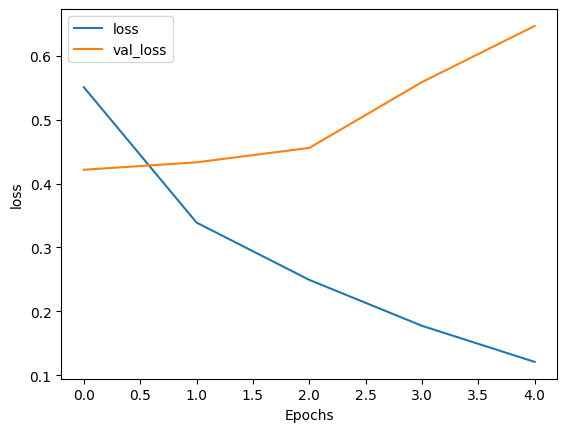

In [13]:
plot_graphs(history, 'accuracy')
plt.show()
plot_graphs(history, 'loss')
plt.show()